## Eliminate from (general) A to (upper triangular) U

Demonstrate Gaussian Elimination (page 51 of GS)

(Reminder: Julia programming syntax will not be tested in this class, but that doesn't mean you can't learn from
watching the code being executed)

(If you are familiar with Jupyter notebooks and wish to execute yourself, you can download this notebook 
using the download button in the upper right, but WARNING: right click to "download as", or OPTION-click (MAC) or ALT-Click (Linux and Windows I think) on the download icon, or you won't get an ipynb file.) You can then drag into Jupyter.

In [1]:
using Plots

In [2]:
# nice viz for matrices
function lookat(A; redrow=0, rounding=2, showtext=true)
  n = size(A,1)
  plot(legend=false, axis=false)
  rowcolor = redrow > 0 ? :red : :black  
  for i=1:n, j=1:n  
      scatter!( [j],[i], ann=  showtext ? (j,i,round(A[i,j],digits=rounding), :white ) : (j,i,"") ,
                color=abs(A[i,j]) > .0001 ? (i==redrow ? rowcolor : :black) : :white, 
                marker=:square, markersize=30, aspectratio=1, yflip=true, yaxis=[.5,n+.5],xaxis=[.5,n+.5])
  end
  plot!()
end

lookat (generic function with 1 method)

In [3]:
A = rand(1.0:9,4,4)

4×4 Array{Float64,2}:
 4.0  9.0  4.0  9.0
 4.0  7.0  6.0  6.0
 2.0  9.0  8.0  6.0
 7.0  1.0  6.0  8.0

In [4]:
L = fill(0.0,4,4)

4×4 Array{Float64,2}:
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0

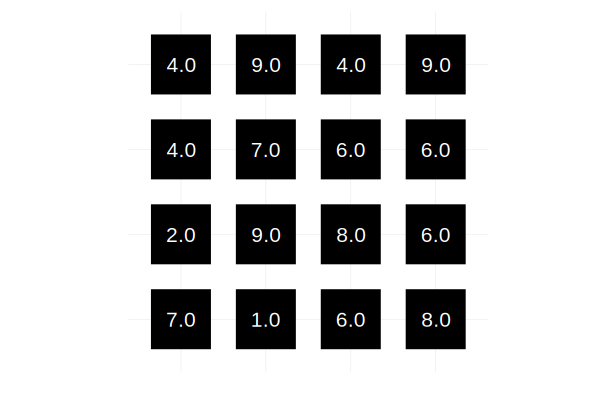

In [5]:
lookat(A)

## What multiple of row 1 must we subtract from row 2 to zero out the (2,1) entry?

In [6]:
L[2,1] = A[2,1] / A[1,1]

1.0

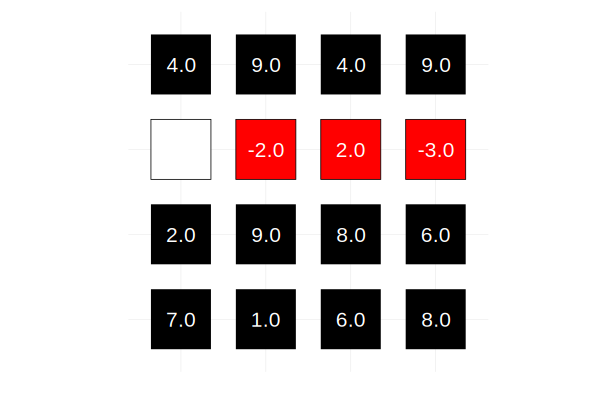

In [7]:
# A[2,:] = A[2,:] - L[2,1] * A[1,:]
A[2,:] -= L[2,1] * A[1,:] # subtract that multiple of the first row from the second
lookat(A, redrow=2)

## What multiple of row 1 must we subtract from row 3 to zero out the (3,1) entry?

In [8]:
L[3,1] = A[3,1] / A[1,1]

0.5

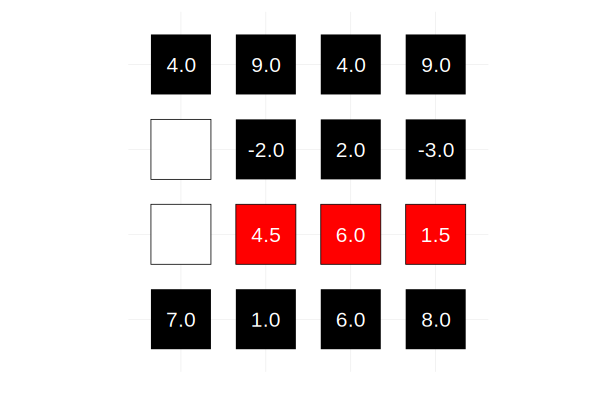

In [9]:
A[3,:] -= L[3,1] * A[1,:]
lookat(A, redrow=3)

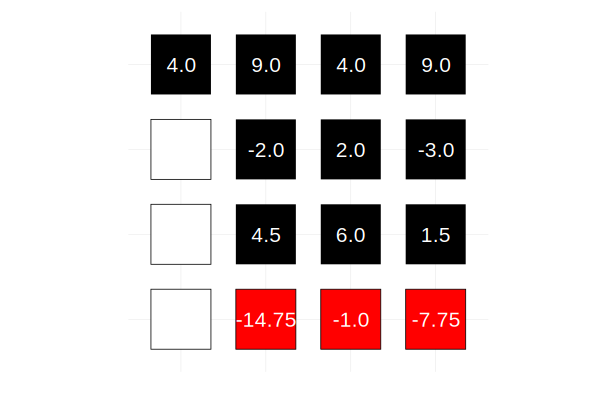

In [10]:
L[4,1] = A[4,1] / A[1,1]
A[4,:] -= L[4,1] * A[1,:]
lookat(A, redrow=4)

In [11]:
L[3,2] = A[3,2] / A[2,2]

-2.25

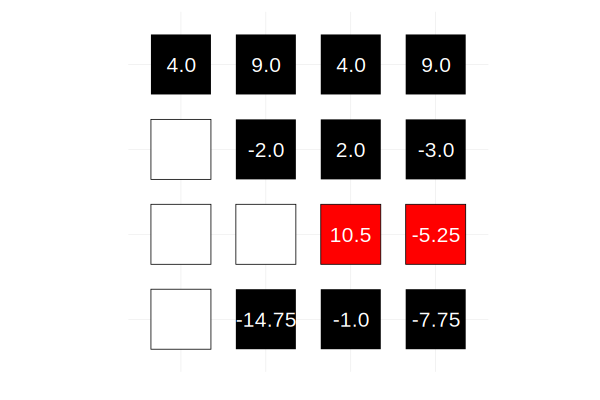

In [12]:
A[3,:] -= L[3,2] * A[2,:]; lookat(A, redrow=3)

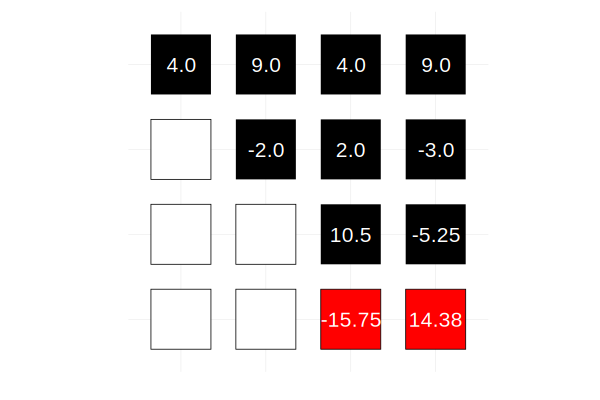

In [13]:
L[4,2] = A[4,2] / A[2,2]; A[4,:] -= L[4,2] * A[2,:]; lookat(A, redrow=4)

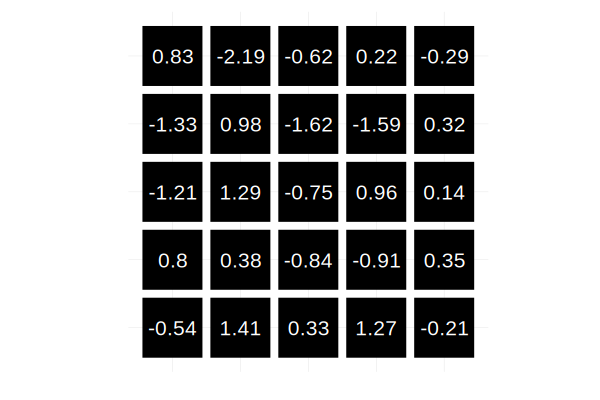

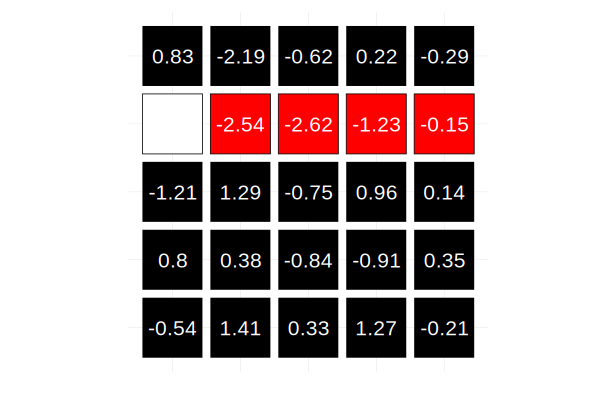

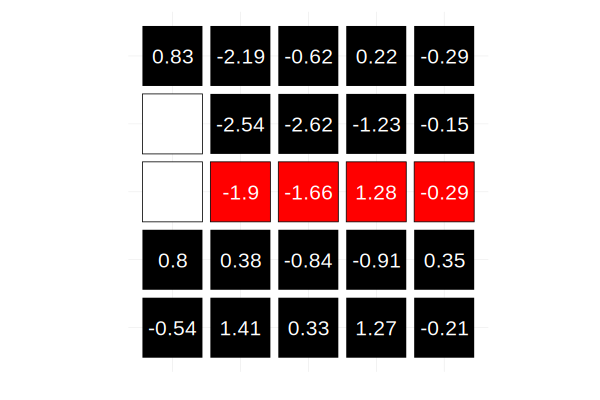

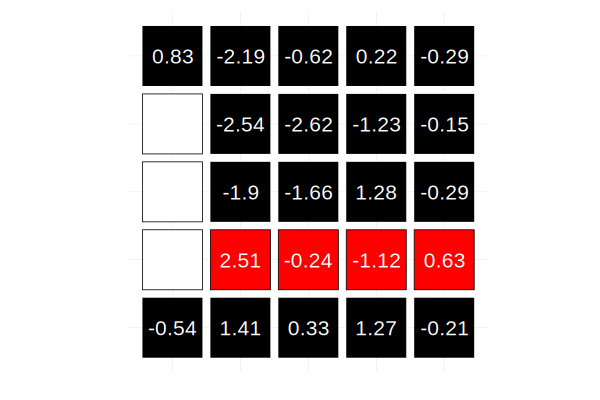

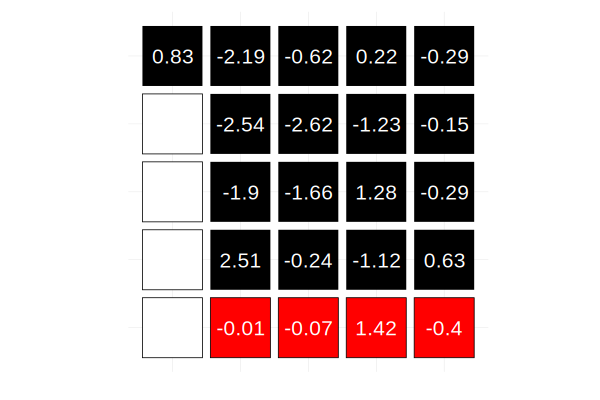

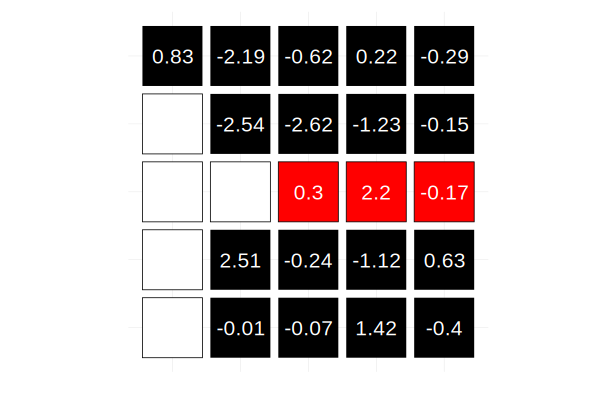

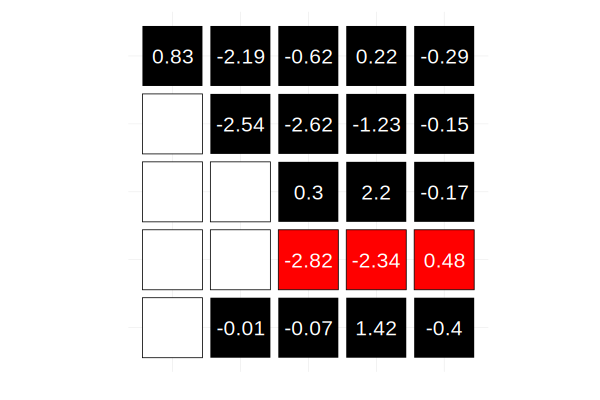

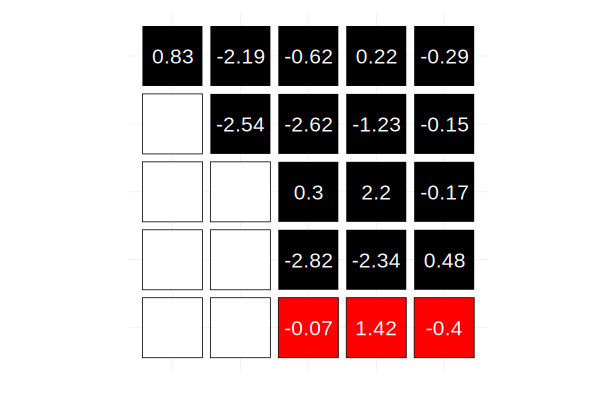

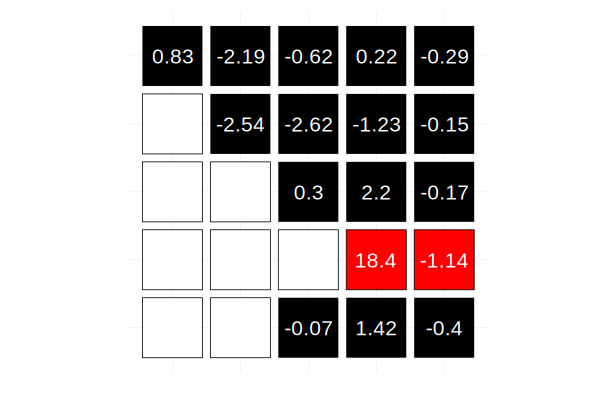

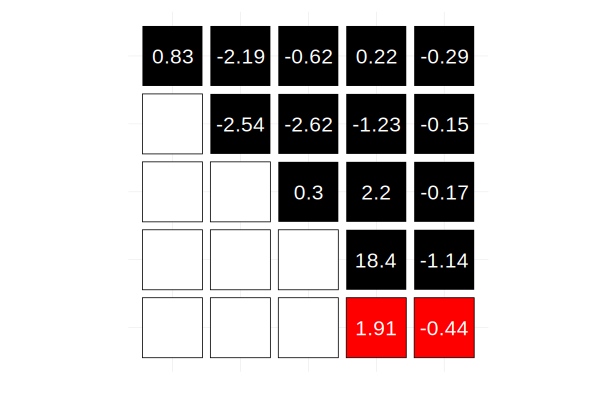

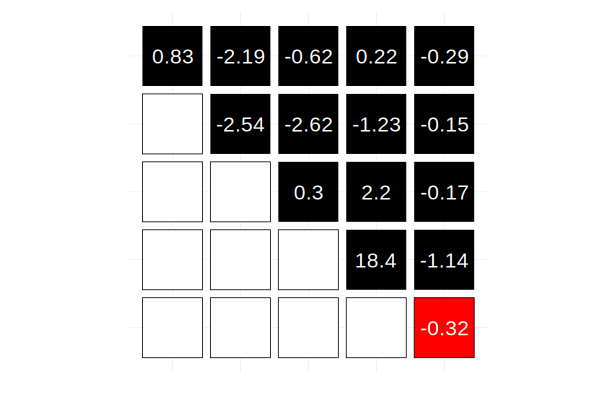

In [14]:
n = 5
A = randn(n,n)
L = fill(0.0,n,n)
display(lookat(A))
for j=1:n, i=(j+1):n
        L[i,j] = A[i,j]/A[j,j]
        A[i,:] -= L[i,j] * A[j,:]
        display(lookat(A,redrow=i))
end

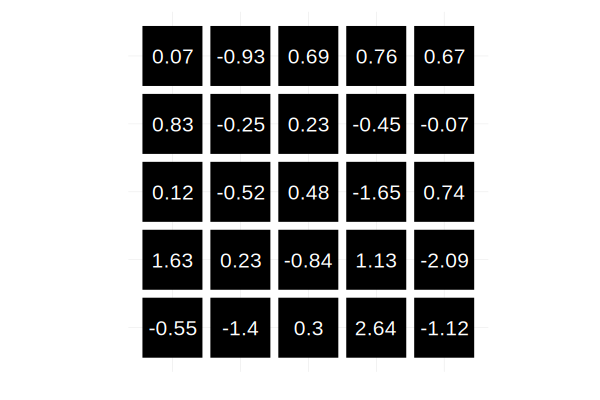

In [15]:
n = 5
A = randn(n,n)
L = fill(0.0,n,n)
Akeep = [copy(A)]
row = [0]
display(lookat(A))
for j=1:n, i=(j+1):n
        L[i,j] = A[i,j]/A[j,j]
        A[i,:] -= L[i,j] * A[j,:]
        push!(Akeep,copy(A))
        push!(row,i)
end

In [16]:
using Interact

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-2387978101050626103\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-14795050379659235485\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-2387978101050626103\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

In [24]:
@manipulate for i=slider(1:length(Akeep),value=1)
      lookat(Akeep[i],redrow=row[i],showtext=true)
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[nothing], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 11,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
1, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/alanedelman/.julia/packages/Knockout/1sDlc/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/alanedelman/.julia/packages/Knockout/1sDlc/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/alanedelman/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/Users/alanedelman/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/Users/alanedelman/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000010ae28250, Task (runnable) @0x000000010ae28250), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"17084213940907812968\",\"id\":\"ob_10\",\"type\":\"observable\"}),\"index\":WebIO.getva

In [18]:
using LinearAlgebra

In [19]:
U =  Akeep[end]
A =  Akeep[1]
L += I

5×5 Array{Float64,2}:
  1.0       0.0        0.0      0.0      0.0
 11.2268    1.0        0.0      0.0      0.0
  1.65127   0.100262   1.0      0.0      0.0
 22.1736    2.04623   -7.9508   1.0      0.0
 -7.45666  -0.817478  -7.32798  1.03327  1.0

In [20]:
L*U

5×5 Array{Float64,2}:
  0.0737129  -0.934928   0.686715   0.756193   0.665156
  0.827557   -0.250188   0.22969   -0.451796  -0.067432
  0.12172    -0.516531   0.479388  -1.64916    0.735843
  1.63448     0.234953  -0.837002   1.12689   -2.08616 
 -0.549652   -1.40446    0.295059   2.6386    -1.12414 

In [21]:
A

5×5 Array{Float64,2}:
  0.0737129  -0.934928   0.686715   0.756193   0.665156
  0.827557   -0.250188   0.22969   -0.451796  -0.067432
  0.12172    -0.516531   0.479388  -1.64916    0.735843
  1.63448     0.234953  -0.837002   1.12689   -2.08616 
 -0.549652   -1.40446    0.295059   2.6386    -1.12414 

In [22]:
L*U ≈ A

true